In [1]:
%load_ext lab_black

# Generate data with a toy poisson rate function

import numpy as np
import pandas as pd
from functools import partial

from scipy.integrate import quad

x_min = 0
x_max = 10


def rate_density(x, a):
    """simple linear rate density
    """
    return a * x


def n_expected(a):
    return 0.5 * a * (x_max ** 2 - x_min ** 2)  # integral(rate_density, x_min, x_max)


def generate_data(a, with_samples=False, unc=0.3, Nk=64):
    # Generate total number
    n = np.random.poisson(n_expected(a))

    # Generate x values according to rate density (normalized as PDF)
    u = np.random.random(n)

    # From inverting CDF of above normalized density
    x = np.sqrt(u * (x_max ** 2 - x_min ** 2) + x_min ** 2)

    if not with_samples:
        return x
    else:
        return x[:, None] * (1 + np.random.normal(0, unc, size=(n, Nk)))

(array([ 4., 13.,  6.,  5., 18., 19., 24., 19., 19., 18.]),
 array([1.04662872, 1.93081703, 2.81500534, 3.69919365, 4.58338195,
        5.46757026, 6.35175857, 7.23594688, 8.12013519, 9.0043235 ,
        9.8885118 ]),
 <a list of 10 Patch objects>)

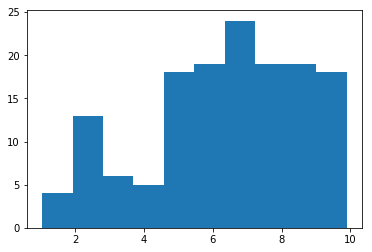

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

a_true = 3
observations = generate_data(a_true)
plt.hist(observations)

In [7]:
from solike.poisson_data import PoissonData

a_grid = np.arange(0.1, 10, 0.1)


def test_experiment(N=100, with_samples=False, Nk=64):
    a_maxlikes = []
    for i in range(N):
        observations = generate_data(a_true, with_samples=with_samples, Nk=Nk)
        if not with_samples:
            catalog = pd.DataFrame({"x": observations})
            data = PoissonData("toy", catalog, ["x"])
        else:
            catalog = pd.DataFrame({"x": observations.mean(axis=1)})
            samples = {"x": observations, "prior": np.ones(observations.shape)}
            data = PoissonData("toy_samples", catalog, ["x"], samples=samples)

        lnl = [data.loglike(partial(rate_density, a=a), n_expected(a)) for a in a_grid]
        a_maxlike = a_grid[np.argmax(lnl)]

        a_maxlikes.append(a_maxlike)

    return np.mean(a_maxlikes)

In [8]:
%timeit test_experiment()

332 ms ± 5.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit test_experiment(with_samples=True, Nk=64)

544 ms ± 37.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
plt.plot(a_grid, lnl)
plt.axvline(a_true, color="r")

NameError: name 'lnl' is not defined

In [30]:
a_maxlike = a_grid[np.argmax(lnl)]
a_maxlike

2.9000000000000004

In [18]:
from inspect import signature

sig = signature(partial(rate_density, a=3))

In [20]:
sig.parameters

mappingproxy({'x': <Parameter "x">, 'a': <Parameter "a=3">})

In [10]:
def other_rate_density(x):
    return 2 * a * x


data.loglike(other_rate_density, 2 * n_expected)

256.5984406948778

In [8]:
def another_rate_density(x):
    return 1 / 2 * a * x


data.loglike(another_rate_density, 0.5 * n_expected)

272.26799216577393

In [2]:
x = np.random.random(10)

In [3]:
x.shape

(10,)

In [4]:
x.ndim

1

In [11]:
from inspect import signature

def myfunc(a, b, c=3):
    return a + b

sig = signature(myfunc)

In [12]:
sig.parameters

mappingproxy({'a': <Parameter "a">,
              'b': <Parameter "b">,
              'c': <Parameter "c=3">})

In [26]:
par.name

'a'

In [13]:
len([p for p in sig.parameters if )

3

In [24]:
par = sig.parameters['a']

<Parameter "a">